<a href="https://colab.research.google.com/github/VirajThakur03/Predict-Stock-Prices-using-Time-Series-Analysis/blob/main/Time_Series_Nifty_Bajaj_deploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [85]:
import seaborn as sns

In [86]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BAJAJFINSV.csv")

In [87]:
df.head(2)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.0,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.0,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558


In [88]:
df.set_index("Date",inplace=True)

In [89]:
df.head(1)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2008-05-26,BAJAJFINSV,EQ,2101.05,600.0,619.0,501.0,505.1,509.1,548.85,3145446,1.726368e+14,NaN,908264,0.2888


In [90]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3.201000e+03,3.201000e+03,2456.000000,3.201000e+03,3201.000000
mean,2755.864386,2760.382381,2803.614449,2716.731443,2758.781537,2758.657451,2761.156954,2.315312e+05,9.533424e+13,20892.811075,7.409510e+04,0.471614
std,2869.811765,2874.814173,2912.885262,2834.037357,2873.792614,2873.522615,2874.033545,4.402681e+05,2.176448e+14,32396.302068,1.464012e+05,0.218910
min,90.750000,88.150000,93.100000,88.150000,91.000000,90.750000,89.260000,4.570000e+02,1.376712e+10,149.000000,4.560000e+02,0.056200
25%,527.900000,528.600000,542.600000,520.000000,527.950000,527.900000,531.270000,3.981100e+04,2.751053e+12,2951.750000,2.086300e+04,0.287400
50%,1098.700000,1095.000000,1118.000000,1080.250000,1100.000000,1098.700000,1103.560000,9.995300e+04,1.090486e+13,9450.000000,4.159700e+04,0.469700
75%,5121.900000,5120.000000,5199.800000,5042.800000,5115.000000,5125.100000,5127.510000,2.315400e+05,8.755946e+13,24439.750000,8.308900e+04,0.636000
max,11176.550000,11000.000000,11300.000000,10868.700000,11175.450000,11176.550000,11081.780000,6.271671e+06,3.394379e+15,312959.000000,3.804696e+06,1.000000


In [91]:
df.isnull().sum()

,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0
Volume,0


In [92]:
df["Trades"].isnull()

,Trades
Date,
2008-05-26,True
2008-05-27,True
2008-05-28,True
2008-05-29,True
2008-05-30,True
...,...
2021-04-26,False
2021-04-27,False
2021-04-28,False


In [93]:
df[df["Trades"].isnull()]

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.00,505.10,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.10,564.00,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.00,643.00,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.00,634.50,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.30,647.00,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-05-25,BAJAJFINSV,EQ,490.50,485.00,498.50,485.00,489.00,485.95,491.58,68329,3.358895e+12,NaN,17938,0.2625
2011-05-26,BAJAJFINSV,EQ,485.95,489.90,491.40,482.20,485.40,484.70,486.95,27605,1.344235e+12,NaN,8579,0.3108
2011-05-27,BAJAJFINSV,EQ,484.70,485.65,492.00,484.05,486.30,486.90,487.88,35212,1.717919e+12,NaN,11239,0.3192


In [94]:
dataframe = df.drop(columns=["Trades"],axis=1)

In [95]:
dataframe.head(1)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,
2008-05-26,BAJAJFINSV,EQ,2101.05,600.0,619.0,501.0,505.1,509.1,548.85,3145446,1.726368e+14,908264,0.2888


In [96]:
dataframe.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [97]:
dataframe.isnull().sum()

,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0
Volume,0


In [98]:
dataframe.dtypes

,0
Symbol,object
Series,object
Prev Close,float64
Open,float64
High,float64
Low,float64
Last,float64
Close,float64
VWAP,float64
Volume,int64


In [99]:
dataframe.duplicated()

,0
Date,
2008-05-26,False
2008-05-27,False
2008-05-28,False
2008-05-29,False
2008-05-30,False
...,...
2021-04-26,False
2021-04-27,False
2021-04-28,False


In [100]:
dataframe[dataframe.duplicated()]

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,


<Axes: xlabel='Date'>

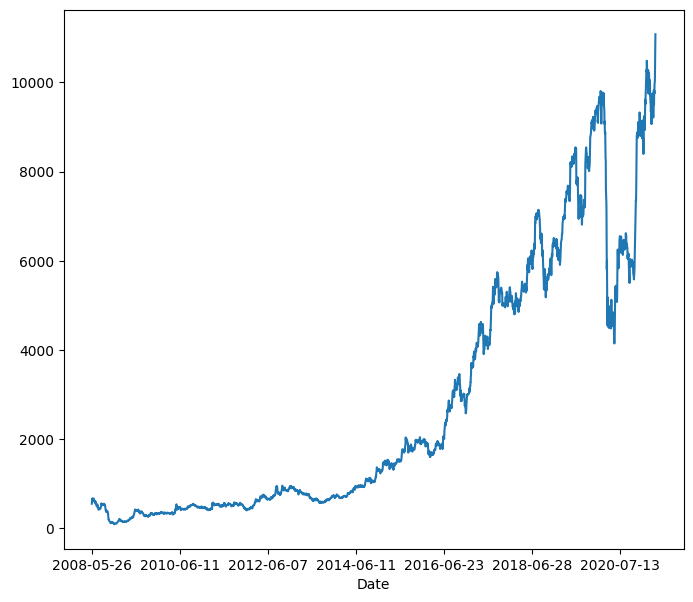

In [101]:
dataframe['VWAP'].plot(figsize=(8,7))

<Axes: xlabel='VWAP', ylabel='Count'>

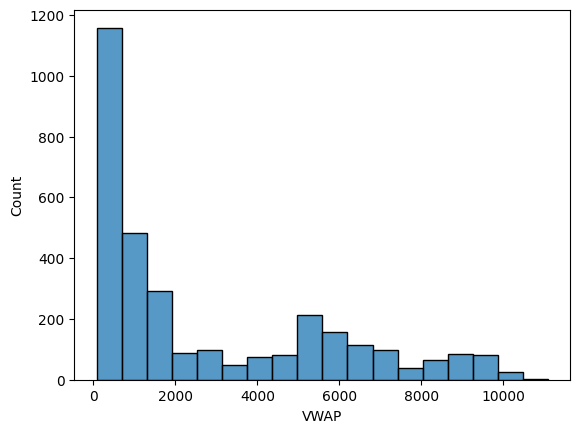

In [102]:
sns.histplot(data=dataframe,x='VWAP')

<Axes: xlabel='VWAP', ylabel='Density'>

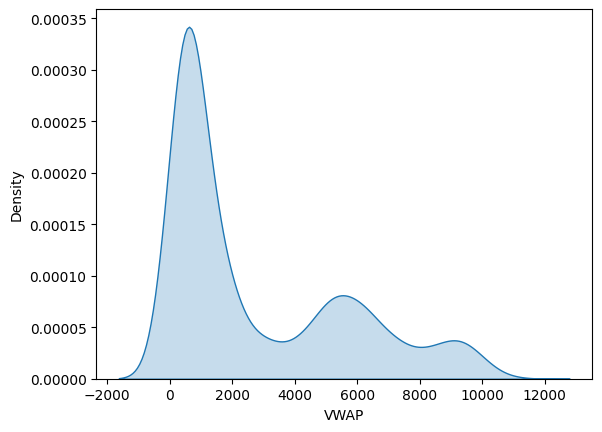

In [103]:
sns.kdeplot(data=dataframe,x='VWAP',fill=True)

In [104]:
dataframe.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [105]:
from scipy import stats

((array([-3.51908695, -3.27647555, -3.14237236, ...,  3.14237236,
          3.27647555,  3.51908695]),
  array([   89.26,    93.99,    94.79, ..., 10486.75, 10980.4 , 11081.78])),
 (np.float64(2583.530410402808),
  np.float64(2761.156954076851),
  np.float64(0.8981685068494002)))

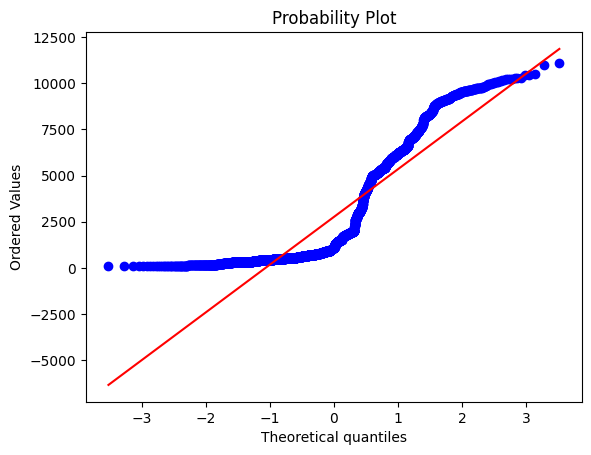

In [106]:
stats.probplot(x=dataframe['VWAP'],plot=plt)

In [107]:
col = ['Open', 'High', 'Low','Close']

<Axes: xlabel='Date'>

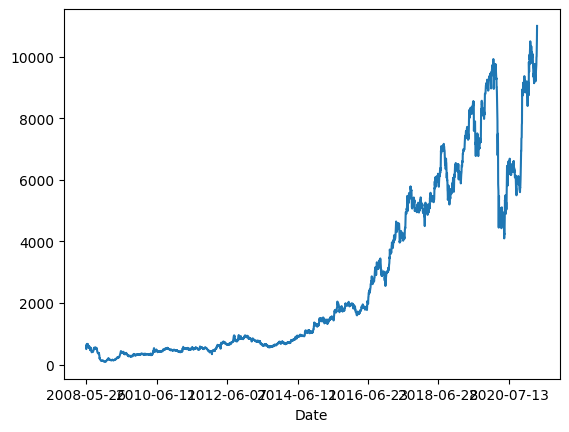

In [108]:
dataframe['Open'].plot()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

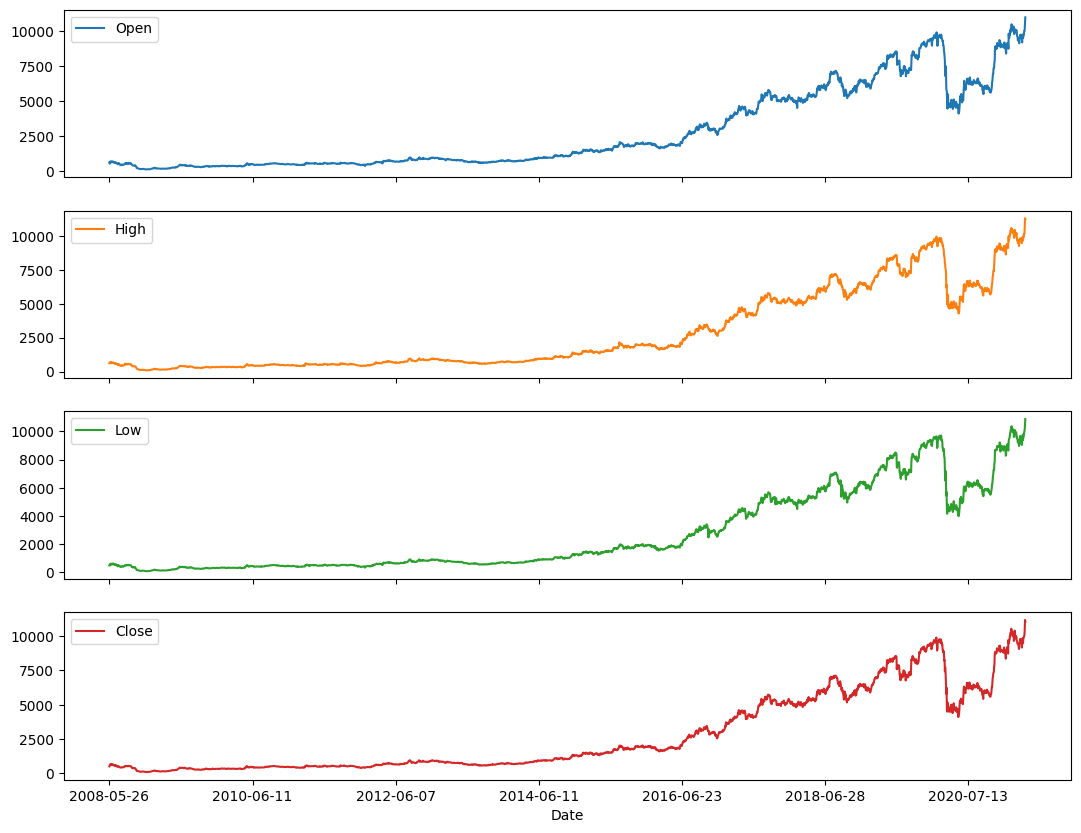

In [109]:
dataframe[col].plot(subplots=True,figsize=(13,10))

In [110]:
!pip install plotly


In [111]:
import plotly.graph_objects as go

In [112]:
dataframe.index[0:50]


Index(['2008-05-26', '2008-05-27', '2008-05-28', '2008-05-29', '2008-05-30',
       '2008-06-02', '2008-06-03', '2008-06-04', '2008-06-05', '2008-06-06',
       '2008-06-09', '2008-06-10', '2008-06-11', '2008-06-12', '2008-06-13',
       '2008-06-16', '2008-06-17', '2008-06-18', '2008-06-19', '2008-06-20',
       '2008-06-23', '2008-06-24', '2008-06-25', '2008-06-26', '2008-06-27',
       '2008-06-30', '2008-07-01', '2008-07-02', '2008-07-03', '2008-07-04',
       '2008-07-07', '2008-07-08', '2008-07-09', '2008-07-10', '2008-07-11',
       '2008-07-14', '2008-07-15', '2008-07-16', '2008-07-17', '2008-07-18',
       '2008-07-21', '2008-07-22', '2008-07-23', '2008-07-24', '2008-07-25',
       '2008-07-28', '2008-07-29', '2008-07-30', '2008-07-31', '2008-08-01'],
      dtype='object', name='Date')

In [113]:
go.Figure(data=[go.Candlestick(x=dataframe.index[0:50],
                               open=dataframe['Open'][0:50],
                               close=dataframe['Close'][0:50],
                               high=dataframe['High'][0:50],
                               low=dataframe['Low'][0:50])])

In [114]:
fig = go.Figure(data=[go.Candlestick(x=dataframe.index[0:50],
                               open=dataframe['Open'][0:50],
                               close=dataframe['Close'][0:50],
                               high=dataframe['High'][0:50],
                               low=dataframe['Low'][0:50])])

In [115]:
fig.update_layout(xaxis_rangeslider_visible=False)

In [116]:
dataframe.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [117]:
imp_features = ['High','Low','Volume','Turnover']
window1=3
window2=7

In [118]:
dataframe['High'].rolling(window=3).mean()

,High
Date,
2008-05-26,NaN
2008-05-27,NaN
2008-05-28,631.850000
2008-05-29,659.850000
2008-05-30,678.866667
...,...
2021-04-26,10059.766667
2021-04-27,10133.466667
2021-04-28,10291.316667


In [119]:
for col in imp_features:
  dataframe[col + "rolling_mean_3"] = dataframe[col].rolling(window=window1).mean()
  dataframe[col + "rolling_mean_7"] = dataframe[col].rolling(window=window2).mean()

In [120]:
dataframe.head(2)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Deliverable Volume,%Deliverble,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-26,BAJAJFINSV,EQ,2101.05,600.0,619.00,501.0,505.1,509.10,548.85,3145446,...,908264,0.2888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-05-27,BAJAJFINSV,EQ,509.10,505.0,610.95,491.1,564.0,554.65,572.15,4349144,...,677627,0.1558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
dataframe.shape

(3201, 21)

In [122]:
for col in imp_features:
  dataframe[col + "rolling_std_3"] = dataframe[col].rolling(window=window1).std()
  dataframe[col + "rolling_std_7"] = dataframe[col].rolling(window=window2).std()

In [123]:
dataframe.head(2)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-26,BAJAJFINSV,EQ,2101.05,600.0,619.00,501.0,505.1,509.10,548.85,3145446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-05-27,BAJAJFINSV,EQ,509.10,505.0,610.95,491.1,564.0,554.65,572.15,4349144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
dataframe.shape

(3201, 29)

In [125]:
dataframe.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3',
       'Turnoverrolling_std_7'],
      dtype='object')

In [126]:
dataframe.isnull().sum()

,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0
Volume,0


In [127]:
dataframe.dropna(inplace=True)

In [128]:
dataframe.isnull().sum()

,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0
Volume,0


In [129]:
training_data = dataframe[0:2400]
testing_data = dataframe[2400:]


In [130]:
len(training_data)

2400

In [131]:
!pip install pmdarima

In [132]:
from pmdarima import auto_arima

In [133]:
dataframe.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3',
       'Turnoverrolling_std_7'],
      dtype='object')

In [134]:
ind_features = ['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3',
       'Turnoverrolling_std_7']

In [162]:
model = auto_arima(y=training_data['VWAP'],X=training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=21501.833, Time=5.51 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=22553.316, Time=2.30 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=21962.077, Time=3.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=21621.884, Time=5.73 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=38832.057, Time=2.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=21603.213, Time=5.48 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=21569.178, Time=6.91 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=21504.414, Time=6.12 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=21496.750, Time=9.95 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=21507.719, Time=5.63 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=21498.537, Time=8.36 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=21493.519, Time=6.68 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=21504.642, Time=8.90 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=21484.777, Time=10.45 sec
 ARIMA(4,0,4)(0,0,

In [163]:
model.fit(y=training_data['VWAP'], X=training_data[ind_features])

ARIMA(order=(3, 0, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [164]:
model

ARIMA(order=(3, 0, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [165]:
from warnings import filterwarnings
filterwarnings("ignore")

In [166]:
forecast = model.predict(n_periods=len(testing_data),X=testing_data[ind_features])

In [167]:
forecast

,0
2400,5062.224946
2401,5067.130610
2402,5140.048745
2403,5181.637921
2404,5206.014536
...,...
3190,9986.609074
3191,10045.025372
3192,10286.855547
3193,10784.738617


In [168]:
testing_data['forecast_ARIMA'] = forecast.values

In [169]:
testing_data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'forecast_ARIMA'],
      dtype='object')

In [170]:
testing_data.head(2)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Turnoverrolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,forecast_ARIMA
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-09,BAJAJFINSV,EQ,5057.25,4989.9,5088.0,4961.2,5068.0,5059.35,5037.19,144600,...,1.265139e+14,61.024585,79.389987,24.407188,167.521603,30344.593758,91750.413573,1.452758e+13,4.514870e+13,5062.224946
2018-02-12,BAJAJFINSV,EQ,5059.35,5096.3,5244.0,5042.8,5210.0,5235.45,5184.22,141176,...,1.122500e+14,78.136632,103.400785,43.676538,183.106338,6967.448983,89474.878072,3.329531e+12,4.375212e+13,5067.130610


In [171]:
testing_data[['forecast_ARIMA','VWAP']]

,forecast_ARIMA,VWAP
Date,,
2018-02-09,5062.224946,5037.19
2018-02-12,5067.130610,5184.22
2018-02-14,5140.048745,5272.21
2018-02-15,5181.637921,5197.04
2018-02-16,5206.014536,5089.32
...,...,...
2021-04-26,9986.609074,9995.72
2021-04-27,10045.025372,10036.76
2021-04-28,10286.855547,10445.96


<Axes: xlabel='Date'>

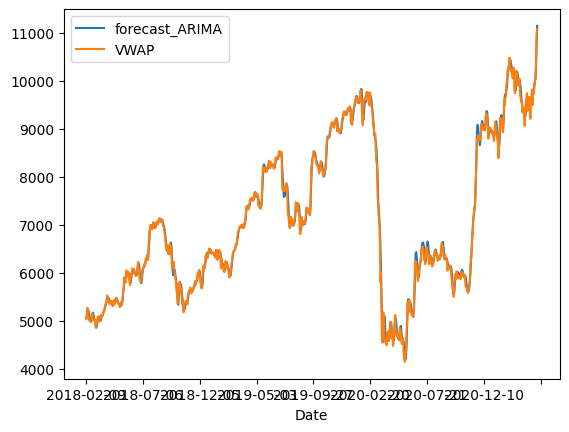

In [172]:
testing_data[['forecast_ARIMA','VWAP']].plot()

In [173]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [174]:
mean_squared_error(testing_data['VWAP'],testing_data['forecast_ARIMA'])

11856.307415732854

In [175]:
np.sqrt(mean_squared_error(testing_data['VWAP'],testing_data['forecast_ARIMA']))

np.float64(108.88667235127012)

In [176]:
mean_absolute_error(testing_data['VWAP'],testing_data['forecast_ARIMA'])

76.35883907953557